In [1]:
import os
import librosa
import numpy as np
from sklearn.model_selection import train_test_split
import pandas as pd
import librosa
import soundfile as sf
import noisereduce as nr
from scipy.signal import firwin, filtfilt,lfilter,butter

In [2]:
# Define the directory containing the raw audio files
raw_audio_dir = '/home/jupyter/data/raw_data/'

# Define the directory where the processed data will be saved
processed_data_dir = '/home/jupyter/data/processed/'

# pacific_imperial_raw = os.path.join(raw_audio_dir, 'pacific_imperial_pigeon_raw')
# pacific_imperial_processed = os.path.join(processed_data_dir, 'pacific_imperial_pigeon')

# white_throated_raw = os.path.join(raw_audio_dir, 'white_throated_pigeon_raw')
# white_throated_processed = os.path.join(processed_data_dir, 'white_throated_pigeon')

tooth_billed_raw = os.path.join(raw_audio_dir, 'tooth_billed_pigeon_raw')
tooth_billed_processed = os.path.join(processed_data_dir, 'tooth_billed_pigeon')

# crimson_crowned_fruit_dove_raw = os.path.join('/home/jupyter/', 'data/crimson_crowned_fruit_dove_raw')
# crimson_crowned_fruit_dove_processed = os.path.join(processed_data_dir, 'crimson_crowned_fruit_dove')
uncertain_raw = os.path.join(raw_audio_dir, 'uncertain')
uncertain_processed = os.path.join(processed_data_dir, 'uncertain')

In [3]:
# def find_csv_file(directory):
#     for file in os.listdir(directory):
#         if file.endswith('.csv'):
#             return os.path.join(directory, file)
#     return None

# def load_metadata(csv_path):
#     return pd.read_csv(csv_path)

# def create_directory_structure(base_path):
#     """
#     Create the following folder structure:
#     base_path/
#         |---segmented_audio
#         |---spectrogram
#         |---melspectrogram
#         |---mfcc
#     """
#     subfolders = ['segmented_audio', 'spectrogram', 'melspectrogram', 'mfcc']
#     subsubfolders = ['raw', 'noisy', 'denoised', 'pitch_shifted', 'time_stretched', 'time_masked', 'volume_adjusted']
    
#     for subfolder in subfolders:
#         for subsubfolder in subsubfolders:
#             folder_path = os.path.join(base_path, subfolder, subsubfolder)
#             os.makedirs(folder_path, exist_ok=True)
#             print(f"Created directory: {folder_path}")

# def fir_bandpass_filter(data, lowcut, highcut, fs, numtaps=2048,window = 'hamming'):
#     """
#     Design and apply an FIR bandpass filter to the input data.

#     Parameters:
#     data (array): Input audio signal
#     lowcut (float): Lower cutoff frequency (Hz)
#     highcut (float): Upper cutoff frequency (Hz)
#     fs (float): Sampling frequency (Hz)
#     numtaps (int): Number of filter taps (default: 101)

#     Returns:
#     y (array): Filtered audio signal
#     """
#     nyquist = 0.5 * fs
#     low = (lowcut)/ nyquist
#     high = (highcut) / nyquist
#     b = firwin(numtaps, [low, high], pass_zero=False, window = window)
#     y = filtfilt(b, 1.0, data)
#     # Apply filter
#     return y

# def highpass_filter(data, cutoff_freq, fs, order=5):
#     nyquist = 0.5 * fs
#     cutoff = cutoff_freq / nyquist
#     b, a = butter(order, cutoff, btype='high', analog=False, output='ba')
#     y = filtfilt(b, a, data)
#     return y

# def noisereduce_wav(y, sr):
#     epsilon = 1e-10
#     y = nr.reduce_noise(y=y+epsilon,stationary=False, sr=sr,n_fft=2048,
#                         prop_decrease=0.99,
#                         win_length=2048,
#                         hop_length=512,
#                         time_mask_smooth_ms=50,
#                         freq_mask_smooth_hz=50,
#                         n_jobs=-1)
#     return y


# def normalize_amplitude(original, processed):
#     original_rms = np.sqrt(np.mean(original**2))
#     processed_rms = np.sqrt(np.mean(processed**2))
#     if processed_rms == 0:  # Avoid division by zero
#         return processed
#     gain = original_rms / processed_rms
#     return processed * gain

# def match_target_amplitude(y, target_dBFS = -20):
#     """
#     Used to standardize volume of audio clip.

#     Arguments:
#     y -- audio time series
#     target_dBFS -- target dBFS level

#     Returns:
#     y -- audio time series with standardized volume
#     """
#     rms = (y ** 2).mean() ** 0.5
#     scalar = 10 ** (target_dBFS / 20) / (rms + 1e-9)
#     return y * scalar

# import numpy as np
# import os
# import soundfile as sf

# def apply_fade(audio, sr, fade_duration=0.1):
#     """
#     Apply fade-in and fade-out to the audio segment.
    
#     Args:
#     audio (np.array): The audio data to fade.
#     sr (int): The sample rate of the audio.
#     fade_duration (float): Duration of the fade-in and fade-out in seconds.

#     Returns:
#     np.array: The audio data with applied fade-in and fade-out.
#     """
#     fade_samples = int(fade_duration * sr)
#     fade_in = np.linspace(0, 1, fade_samples)
#     fade_out = np.linspace(1, 0, fade_samples)

#     audio[:fade_samples] *= fade_in
#     audio[-fade_samples:] *= fade_out

#     return audio
    
# def pad_audio(audio, target_duration, sample_rate):
#     """
#     Pad the audio with silence evenly on both sides to reach the target duration.
    
#     Args:
#     audio (np.array): The audio data to pad.
#     target_duration (float): The desired duration in seconds.
#     sample_rate (int): The sample rate of the audio.

#     Returns:
#     np.array: The padded audio data.
#     """
#     current_samples = len(audio)
#     target_samples = int(target_duration * sample_rate)
    
#     if current_samples < target_samples:
#         pad_length = target_samples - current_samples
#         pad_left = pad_length // 2
#         pad_right = pad_length - pad_left  # This accounts for odd pad_length
#         padded_audio = np.pad(audio, (pad_left, pad_right), 'constant')
#         print(f"Padding audio from {current_samples} to {target_samples} samples")
#         return padded_audio
#     else:
#         return audio[:target_samples]  # Truncate if longer than target duration

# def process_and_segment_audio(audio, sr, df_file, output_base_path, fmin, fmax, segment_length=2.0):
#     """
#     Process and segment audio files based on metadata from a CSV file.
    
#     Args:
#     audio (np.array): The audio data.
#     sr (int): The sample rate of the audio.
#     df_file (pd.DataFrame): DataFrame containing metadata for the audio file.
#     output_base_path (str): Base path for output directories.
#     segment_length (float): Length of each segment in seconds.
#     overlap_percent (float): Percentage of overlap between adjacent segments.
#     """
#     print("Applying band-pass filter...")
#     # filtered_audio = highpass_filter(audio, 150, sr)
#     filtered_audio = fir_bandpass_filter(audio, fmin, fmax, sr)
    
#     filtered_audio = match_target_amplitude(filtered_audio)
    
#     print("Applying noise reduction to entire audio...")
#     denoised_audio = noisereduce_wav(filtered_audio, sr)
    
#     denoised_audio = match_target_amplitude(denoised_audio)
    
#     raw_dir = os.path.join(output_base_path, 'segmented_audio', 'raw')
#     denoised_dir = os.path.join(output_base_path, 'segmented_audio', 'denoised')
    
#     for _, row in df_file.iterrows():
#         start_time = round(row['start_time'], 2)
#         end_time = round(row['end_time'], 2)
#         species = row['species'].replace(" ", "_")
#         duration = end_time - start_time
        
#         print(f"Processing segment for {species} from {start_time} to {end_time}")
        
#         if duration <= segment_length:
#             # For segments shorter than or equal to 1.5 seconds
#             segment_starts = [
#                 start_time,
#                 # max(round(start_time - (segment_length - overlap_percent * segment_length), 2), 0),
#                 # min(round(start_time + (segment_length - overlap_percent * segment_length), 2), len(audio) / sr - segment_length)
#             ]
#             # segment_ends = [segment_starts[0] + duration, segment_starts[1] + duration ,min(segment_starts[2] + duration, end_time)]
#             segment_ends = [segment_starts[0] + duration]   
#         else:
#             # For segments longer than 1.5 seconds
#             segment_starts = []
#             current_start = start_time
#             while current_start < end_time:
#                 segment_starts.extend([
#                     # max(round(current_start - (segment_length - overlap_percent * segment_length), 2), 0),
#                     current_start,
#                     # min(round(current_start + (segment_length - overlap_percent * segment_length), 2), len(audio) / sr - segment_length)
#                 ])
#                 current_start += segment_length  # Move by segment_length each time
            
#             # Remove duplicates and sort
#             segment_starts = sorted(set(segment_starts))
#             segment_ends = [min(start + segment_length, end_time) for start in segment_starts]

#             # Remove the last segment if it's shorter than segment_length
#             if segment_ends[-1] - segment_starts[-1] < segment_length:
#                 segment_starts.pop()
#                 segment_ends.pop()
        
#         for seg_start, seg_end in zip(segment_starts, segment_ends):
#             print(f"  Extracting segment from {seg_start} to {seg_end}")
            
#             # Extract segments
#             original_segment = audio[int(seg_start * sr):int(seg_end * sr)]
#             denoised_segment = denoised_audio[int(seg_start * sr):int(seg_end * sr)]
            
#             # Extract and pad segments if necessary
#             original_segment = pad_audio(audio[int(seg_start * sr):int(seg_end * sr)], segment_length, sr)
#             denoised_segment = pad_audio(denoised_audio[int(seg_start * sr):int(seg_end * sr)], segment_length, sr)
            
#             # Save raw segment
#             save_segment(original_segment, sr, row['filename'], seg_start, seg_end, species, raw_dir)
#             save_segment(denoised_segment, sr, row['filename'], seg_start, seg_end, species, denoised_dir)
            
#             print(f"  Saved raw and denoised segments")

# def save_segment(segment, sr, original_filename, start, end, species, output_dir):
#     species_dir = os.path.join(output_dir, species)
#     os.makedirs(species_dir, exist_ok=True)
    
#     segment_filename = os.path.join(species_dir, f"{os.path.splitext(original_filename)[0]}_{int(start*1000)}_{int(end*1000)}.wav")
#     sf.write(segment_filename, segment, sr)
#     print(f"Saved segment: {segment_filename}")

# def process_all_audio_files(df, base_audio_path, output_base_path, fmin=150, fmax=650, segment_length=2.0):
#     grouped = df.groupby('filename')
    
#     for filename, group_df in grouped:
#         input_path = os.path.join(base_audio_path, filename)
#         if os.path.exists(input_path):
#             print(f"Processing file: {input_path}")
#             audio, sr = librosa.load(input_path)
#             process_and_segment_audio(audio, sr, group_df, output_base_path, fmin = fmin, fmax=fmax, segment_length=segment_length)
#         else:
#             print(f"File not found: {input_path}")


In [7]:
import numpy as np
import os
import soundfile as sf
import pandas as pd
import librosa
from scipy.signal import butter, filtfilt, firwin
import noisereduce as nr

def find_csv_file(directory):
    for file in os.listdir(directory):
        if file.endswith('.csv'):
            return os.path.join(directory, file)
    return None

def load_metadata(csv_path):
    return pd.read_csv(csv_path)

def create_directory_structure(base_path):
    """
    Create the following folder structure:
    base_path/
        |---segmented_audio
            |---raw
            |---bandpass
            |---denoised
    """
    subfolders = ['segmented_audio']
    subsubfolders = ['raw', 'bandpass', 'denoised']
    
    for subfolder in subfolders:
        for subsubfolder in subsubfolders:
            folder_path = os.path.join(base_path, subfolder, subsubfolder)
            os.makedirs(folder_path, exist_ok=True)
            print(f"Created directory: {folder_path}")

def fir_bandpass_filter(data, lowcut, highcut, fs, numtaps=2048, window='hamming'):
    nyquist = 0.5 * fs
    low = (lowcut) / nyquist
    high = (highcut) / nyquist
    b = firwin(numtaps, [low, high], pass_zero=False, window=window)
    y = filtfilt(b, 1.0, data)
    return y

def highpass_filter(data, cutoff_freq, fs, order=5):
    nyquist = 0.5 * fs
    cutoff = cutoff_freq / nyquist
    b, a = butter(order, cutoff, btype='high', analog=False, output='ba')
    y = filtfilt(b, a, data)
    return y

def noisereduce_wav(y, sr):
    epsilon = 1e-10
    y = nr.reduce_noise(y=y+epsilon,stationary=False, sr=sr,n_fft=2048,
                        prop_decrease=0.99,
                        win_length=2048,
                        hop_length=512,
                        time_mask_smooth_ms=50,
                        freq_mask_smooth_hz=50,
                        n_jobs=-1)
    return y

def normalize_amplitude(original, processed):
    original_rms = np.sqrt(np.mean(original**2))
    processed_rms = np.sqrt(np.mean(processed**2))
    if processed_rms == 0:  # Avoid division by zero
        return processed
    gain = original_rms / processed_rms
    return processed * gain

def match_target_amplitude(y, target_dBFS=-20):
    rms = (y ** 2).mean() ** 0.5
    scalar = 10 ** (target_dBFS / 20) / (rms + 1e-9)
    return y * scalar

def apply_fade(audio, sr, fade_duration=0.1):
    fade_samples = int(fade_duration * sr)
    fade_in = np.linspace(0, 1, fade_samples)
    fade_out = np.linspace(1, 0, fade_samples)

    audio[:fade_samples] *= fade_in
    audio[-fade_samples:] *= fade_out

    return audio


def pad_audio_with_clipping(audio, target_duration, sample_rate, original_audio, start_idx, end_idx):
    """
    Pad the audio with clipping from just before and after the segment.

    Args:
    audio (np.array): The audio data to pad.
    target_duration (float): The desired duration in seconds.
    sample_rate (int): The sample rate of the audio.
    original_audio (np.array): The original audio data to use for padding.
    start_idx (int): The start index of the segment in the original audio.
    end_idx (int): The end index of the segment in the original audio.

    Returns:
    np.array: The padded audio data.
    """
    current_samples = len(audio)
    target_samples = int(target_duration * sample_rate)
    
    if current_samples < target_samples:
        pad_length = target_samples - current_samples
        pad_left = original_audio[max(0, start_idx - pad_length // 2):start_idx]
        pad_right = original_audio[end_idx:min(len(original_audio), end_idx + pad_length - len(pad_left))]
        
        # If not enough padding on either side, use remaining padding from the other side
        if len(pad_left) + len(pad_right) < pad_length:
            if len(pad_left) < pad_length // 2:
                pad_right = original_audio[end_idx:end_idx + pad_length - len(pad_left)]
            if len(pad_right) < pad_length // 2:
                pad_left = original_audio[start_idx - pad_length + len(pad_right):start_idx]
        
        padded_audio = np.concatenate([pad_left, audio, pad_right])
        print(f"Padding audio from {current_samples} to {target_samples} samples")
        return padded_audio
    else:
        return audio[:target_samples]  # Truncate if longer than target duration

def process_and_segment_audio(audio, sr, df_file, output_base_path, fmin, fmax, segment_length=2.0):
    """
    Process and segment audio files based on metadata from a CSV file.
    
    Args:
    audio (np.array): The audio data.
    sr (int): The sample rate of the audio.
    df_file (pd.DataFrame): DataFrame containing metadata for the audio file.
    output_base_path (str): Base path for output directories.
    segment_length (float): Length of each segment in seconds.
    overlap_percent (float): Percentage of overlap between adjacent segments.
    """
    print("Applying band-pass filter...")
    # filtered_audio = highpass_filter(audio, 150, sr)
    filtered_audio = fir_bandpass_filter(audio, fmin, fmax, sr)
    
    filtered_audio = match_target_amplitude(filtered_audio)
    
    print("Applying noise reduction to entire audio...")
    denoised_audio = noisereduce_wav(filtered_audio, sr)
    
    denoised_audio = match_target_amplitude(denoised_audio)
    
    raw_dir = os.path.join(output_base_path, 'segmented_audio', 'raw')
    bandpass_dir = os.path.join(output_base_path, 'segmented_audio', 'bandpass')
    denoised_dir = os.path.join(output_base_path, 'segmented_audio', 'denoised')
    
    for _, row in df_file.iterrows():
        start_time = round(row['start_time'], 2)
        end_time = round(row['end_time'], 2)
        species = row['species'].replace(" ", "_")
        duration = end_time - start_time
        
        print(f"Processing segment for {species} from {start_time} to {end_time}")
        
        if duration <= segment_length:
            # For segments shorter than or equal to 1.5 seconds
            segment_starts = [
                start_time,
                # max(round(start_time - (segment_length - overlap_percent * segment_length), 2), 0),
                # min(round(start_time + (segment_length - overlap_percent * segment_length), 2), len(audio) / sr - segment_length)
            ]
            # segment_ends = [segment_starts[0] + duration, segment_starts[1] + duration ,min(segment_starts[2] + duration, end_time)]
            segment_ends = [segment_starts[0] + duration]   
        else:
            # For segments longer than 1.5 seconds
            segment_starts = []
            current_start = start_time
            while current_start < end_time:
                segment_starts.extend([
                    # max(round(current_start - (segment_length - overlap_percent * segment_length), 2), 0),
                    current_start,
                    # min(round(current_start + (segment_length - overlap_percent * segment_length), 2), len(audio) / sr - segment_length)
                ])
                current_start += segment_length  # Move by segment_length each time
            
            # Remove duplicates and sort
            segment_starts = sorted(set(segment_starts))
            segment_ends = [min(start + segment_length, end_time) for start in segment_starts]

            # Remove the last segment if it's shorter than segment_length
            if segment_ends[-1] - segment_starts[-1] < segment_length:
                segment_starts.pop()
                segment_ends.pop()
        
        for seg_start, seg_end in zip(segment_starts, segment_ends):
            print(f"  Extracting segment from {seg_start} to {seg_end}")
            
            # Extract segments
            start_idx = int(seg_start * sr)
            end_idx = int(seg_end * sr)
            original_segment = audio[start_idx:end_idx]
            bandpass_segment = filtered_audio[start_idx:end_idx]
            denoised_segment = denoised_audio[start_idx:end_idx]
            
            # Pad segments if necessary
            original_segment = pad_audio_with_clipping(original_segment, segment_length, sr, audio, start_idx, end_idx)
            bandpass_segment = pad_audio_with_clipping(bandpass_segment, segment_length, sr, filtered_audio, start_idx, end_idx)
            denoised_segment = pad_audio_with_clipping(denoised_segment, segment_length, sr, denoised_audio, start_idx, end_idx)
            
            # Save raw segment
            save_segment(original_segment, sr, row['filename'], seg_start, seg_end, species, raw_dir)
            save_segment(bandpass_segment, sr, row['filename'], seg_start, seg_end, species, bandpass_dir)
            save_segment(denoised_segment, sr, row['filename'], seg_start, seg_end, species, denoised_dir)
            
            print(f"  Saved raw and denoised segments")

def save_segment(segment, sr, original_filename, start, end, species, output_dir):
    species_dir = os.path.join(output_dir, species)
    os.makedirs(species_dir, exist_ok=True)
    
    segment_filename = os.path.join(species_dir, f"{os.path.splitext(original_filename)[0]}_{int(start*1000)}_{int(end*1000)}.wav")
    sf.write(segment_filename, segment, sr)
    print(f"Saved segment: {segment_filename}")

def process_all_audio_files(df, base_audio_path, output_base_path, fmin=150, fmax=650, segment_length=2.0):
    grouped = df.groupby('filename')
    
    for filename, group_df in grouped:
        input_path = os.path.join(base_audio_path, filename)
        if os.path.exists(input_path):
            print(f"Processing file: {input_path}")
            audio, sr = librosa.load(input_path)
            process_and_segment_audio(audio, sr, group_df, output_base_path, fmin = fmin, fmax=fmax, segment_length=segment_length)
        else:
            print(f"File not found: {input_path}")

In [8]:
# Example usage
metadata_directory = uncertain_raw
base_audio_path = uncertain_raw  # Directory where the .wav files are located
csv_file_path = find_csv_file(metadata_directory)
create_directory_structure(uncertain_processed)
segmented_output_path = os.path.join(uncertain_processed,'segmented_audio')

if csv_file_path:
    print(f"Found CSV file: {csv_file_path}")
    metadata_df = load_metadata(csv_file_path)
    if metadata_df is not None:
        process_all_audio_files(metadata_df, base_audio_path, uncertain_processed)

Created directory: /home/jupyter/data/processed/uncertain/segmented_audio/raw
Created directory: /home/jupyter/data/processed/uncertain/segmented_audio/bandpass
Created directory: /home/jupyter/data/processed/uncertain/segmented_audio/denoised
Found CSV file: /home/jupyter/data/raw_data/uncertain/uncertain.csv
Processing file: /home/jupyter/data/raw_data/uncertain/139904_Macaulay_Doug Pratt.wav
Applying band-pass filter...
Applying noise reduction to entire audio...
Processing segment for UNK from 0.08 to 1.39
  Extracting segment from 0.08 to 1.39
Padding audio from 28885 to 44100 samples
Padding audio from 28885 to 44100 samples
Padding audio from 28885 to 44100 samples
Saved segment: /home/jupyter/data/processed/uncertain/segmented_audio/raw/UNK/139904_Macaulay_Doug Pratt_80_1390.wav
Saved segment: /home/jupyter/data/processed/uncertain/segmented_audio/bandpass/UNK/139904_Macaulay_Doug Pratt_80_1390.wav
Saved segment: /home/jupyter/data/processed/uncertain/segmented_audio/denoised/U

Note: Illegal Audio-MPEG-Header 0x00000000 at offset 160624.
Note: Trying to resync...
/var/tmp/ipykernel_1128832/584274279.py:224: UserWarning: PySoundFile failed. Trying audioread instead.
  audio, sr = librosa.load(input_path)
/opt/conda/envs/audio/lib/python3.11/site-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
Note: Skipped 1024 bytes in input.
[src/libmpg123/parse.c:wetwork():1365] error: Giving up resync after 1024 bytes - your stream is not nice... (maybe increasing resync limit could help).


Applying band-pass filter...
Applying noise reduction to entire audio...
Processing segment for UNK from 0.78 to 1.73
  Extracting segment from 0.78 to 1.73
Padding audio from 20947 to 44100 samples
Padding audio from 20947 to 44100 samples
Padding audio from 20947 to 44100 samples
Saved segment: /home/jupyter/data/processed/uncertain/segmented_audio/raw/UNK/Salelologa Aug 2021_f1842340352_780_1730.wav
Saved segment: /home/jupyter/data/processed/uncertain/segmented_audio/bandpass/UNK/Salelologa Aug 2021_f1842340352_780_1730.wav
Saved segment: /home/jupyter/data/processed/uncertain/segmented_audio/denoised/UNK/Salelologa Aug 2021_f1842340352_780_1730.wav
  Saved raw and denoised segments
Processing segment for UNK from 3.16 to 4.5
  Extracting segment from 3.16 to 4.5
Padding audio from 29547 to 44100 samples
Padding audio from 29547 to 44100 samples
Padding audio from 29547 to 44100 samples
Saved segment: /home/jupyter/data/processed/uncertain/segmented_audio/raw/UNK/Salelologa Aug 202

In [9]:
# Example usage
metadata_directory = tooth_billed_raw
base_audio_path = tooth_billed_raw  # Directory where the .wav files are located
csv_file_path = find_csv_file(metadata_directory)
create_directory_structure(tooth_billed_processed)
segmented_output_path = os.path.join(tooth_billed_processed,'segmented_audio')

if csv_file_path:
    print(f"Found CSV file: {csv_file_path}")
    metadata_df = load_metadata(csv_file_path)
    if metadata_df is not None:
        process_all_audio_files(metadata_df, base_audio_path, tooth_billed_processed)
        
# manually remove: Manumea (tooth-billed pigeon) (4).wav


Created directory: /home/jupyter/data/processed/tooth_billed_pigeon/segmented_audio/raw
Created directory: /home/jupyter/data/processed/tooth_billed_pigeon/segmented_audio/bandpass
Created directory: /home/jupyter/data/processed/tooth_billed_pigeon/segmented_audio/denoised
Found CSV file: /home/jupyter/data/raw_data/tooth_billed_pigeon_raw/tooth_billed_pigeon_metadata.csv
Processing file: /home/jupyter/data/raw_data/tooth_billed_pigeon_raw/Confirmed_tooth_billed_pigeon.wav
Applying band-pass filter...
Applying noise reduction to entire audio...
Processing segment for tooth_billed_pigeon from 13.01 to 14.36
  Extracting segment from 13.01 to 14.36
Padding audio from 29768 to 44100 samples
Padding audio from 29768 to 44100 samples
Padding audio from 29768 to 44100 samples
Saved segment: /home/jupyter/data/processed/tooth_billed_pigeon/segmented_audio/raw/tooth_billed_pigeon/Confirmed_tooth_billed_pigeon_13010_14360.wav
Saved segment: /home/jupyter/data/processed/tooth_billed_pigeon/segme

In [6]:
# Example usage
metadata_directory = crimson_crowned_fruit_dove_raw
base_audio_path = crimson_crowned_fruit_dove_raw  # Directory where the .wav files are located
csv_file_path = find_csv_file(metadata_directory)
create_directory_structure(crimson_crowned_fruit_dove_processed)
segmented_output_path = os.path.join(crimson_crowned_fruit_dove_processed,'segmented_audio')

if csv_file_path:
    print(f"Found CSV file: {csv_file_path}")
    metadata_df = load_metadata(csv_file_path)
    if metadata_df is not None:
        process_all_audio_files(metadata_df, base_audio_path, crimson_crowned_fruit_dove_processed)
        
# manually remove: Manumea (tooth-billed pigeon) (4).wav


Created directory: /home/jupyter/data/processed/crimson_crowned_fruit_dove/segmented_audio/raw
Created directory: /home/jupyter/data/processed/crimson_crowned_fruit_dove/segmented_audio/noisy
Created directory: /home/jupyter/data/processed/crimson_crowned_fruit_dove/segmented_audio/denoised
Created directory: /home/jupyter/data/processed/crimson_crowned_fruit_dove/segmented_audio/pitch_shifted
Created directory: /home/jupyter/data/processed/crimson_crowned_fruit_dove/segmented_audio/time_stretched
Created directory: /home/jupyter/data/processed/crimson_crowned_fruit_dove/segmented_audio/time_masked
Created directory: /home/jupyter/data/processed/crimson_crowned_fruit_dove/segmented_audio/volume_adjusted
Created directory: /home/jupyter/data/processed/crimson_crowned_fruit_dove/spectrogram/raw
Created directory: /home/jupyter/data/processed/crimson_crowned_fruit_dove/spectrogram/noisy
Created directory: /home/jupyter/data/processed/crimson_crowned_fruit_dove/spectrogram/denoised
Created

In [139]:
# same code as above but in a single cell
# def find_csv_file(directory):
#     """
#     Search for the first .csv file in the specified directory.
#     """
#     for file in os.listdir(directory):
#         if file.endswith('.csv'):
#             return os.path.join(directory, file)
#     return None

# def load_metadata(csv_path):
#     """
#     Load the metadata from the .csv file into a DataFrame.
#     """
#     df = pd.read_csv(csv_path)
#     df['start_time'] = df['start_time'].astype(float)
#     df['end_time'] = df['end_time'].astype(float)
#     return df

# def create_directory_structure(base_path):
#     """
#     Create the folder structure.
#     """
#     subfolders = ['segmented_audio', 'spectrogram', 'melspectrogram', 'mfcc']
#     subsubfolders = ['raw', 'noisy', 'denoised', 'pitch_shifted', 'time_stretched', 'time_masked', 'volume_adjusted']
    
#     for subfolder in subfolders:
#         for subsubfolder in subsubfolders:
#             folder_path = os.path.join(base_path, subfolder, subsubfolder)
#             os.makedirs(folder_path, exist_ok=True)
#             print(f"Created directory: {folder_path}")

# def fir_bandpass_filter(data, lowcut, highcut, fs, numtaps=2048, window='hamming'):
#     nyquist = 0.5 * fs
#     low = (lowcut - 25) / nyquist
#     high = (highcut + 25) / nyquist
#     b = firwin(numtaps, [low, high], pass_zero=False, window=window)
#     y = filtfilt(b, 1.0, data)
#     return y

# def noisereduce_wav(y, sr=22050):
#     epsilon = 1e-10
#     y = nr.reduce_noise(y=y+epsilon, stationary=False, sr=sr, n_fft=2048,
#                         prop_decrease=1, win_length=2048, hop_length=512,
#                         time_mask_smooth_ms=50, freq_mask_smooth_hz=50,
#                         n_jobs=-1)
#     return y

# def normalize_amplitude(original, processed):
#     original_rms = np.sqrt(np.mean(original**2))
#     processed_rms = np.sqrt(np.mean(processed**2))
#     gain = original_rms / processed_rms
#     return processed * gain

# def process_and_segment_audio(audio, sr, df_file, output_base_path, segment_length=1.63, overlap_percent=0.7):
#     filtered_audio = fir_bandpass_filter(audio, 150, 600, sr)
    
#     raw_dir = os.path.join(output_base_path, 'segmented_audio', 'raw')
#     denoised_dir = os.path.join(output_base_path, 'segmented_audio', 'denoised')
    
#     for _, row in df_file.iterrows():
#         start_time = row['start_time']
#         species = row['species'].replace(" ", "_")
#         overlap = segment_length * overlap_percent
#         segment1_start = start_time
#         segment1_end = start_time + segment_length
#         segment2_start = start_time + (segment_length - overlap)
#         segment2_end = start_time + segment_length + overlap
        
#         for seg_start, seg_end in [(segment1_start, segment1_end), (segment2_start, segment2_end)]:
#             segment = filtered_audio[int(seg_start * sr):int(seg_end * sr)]
            
#             save_segment(segment, sr, row['filename'], seg_start, seg_end, species, raw_dir)
            
#             denoised_segment = noisereduce_wav(segment, sr)
#             normalized_segment = normalize_amplitude(segment, denoised_segment)
#             save_segment(normalized_segment, sr, row['filename'], seg_start, seg_end, species, denoised_dir)

# def save_segment(segment, sr, original_filename, start, end, species, output_dir):
#     species_dir = os.path.join(output_dir, species)
#     os.makedirs(species_dir, exist_ok=True)
    
#     segment_filename = os.path.join(species_dir, f"{os.path.splitext(original_filename)[0]}_{int(start*1000)}_{int(end*1000)}.wav")
#     sf.write(segment_filename, segment, sr)
#     # print(f"Saved: {segment_filename}")

# def process_all_audio_files(df, base_audio_path, output_base_path):
#     grouped = df.groupby('filename')
    
#     for filename, group_df in grouped:
#         input_path = os.path.join(base_audio_path, filename)
#         if os.path.exists(input_path):
#             print(f"Processing file: {input_path}")
#             audio, sr = librosa.load(input_path, sr=None)
#             process_and_segment_audio(audio, sr, group_df, output_base_path)
#         else:
#             print(f"File not found: {input_path}")

# # Example usage
# metadata_directory = tooth_billed_raw
# base_audio_path = tooth_billed_raw  # Directory where the .wav files are located
# csv_file_path = find_csv_file(metadata_directory)
# create_directory_structure(tooth_billed_processed)
# segmented_output_path = tooth_billed_processed

# if csv_file_path:
#     print(f"Found CSV file: {csv_file_path}")
#     metadata_df = load_metadata(csv_file_path)
#     if metadata_df is not None:
#         process_all_audio_files(metadata_df, base_audio_path, segmented_output_path)
# else:
#     print("No CSV file found in the specified directory.")

In [140]:
from IPython.display import Audio, display
import noisereduce as nr
import matplotlib.pyplot as plt

In [141]:
# from IPython.display import Audio

# def display_audio_and_waveforms(audio_list, sr, show_audio=True):
#     """
#     Display audio files and their waveforms.
    
#     Parameters:
#     audio_list (list): List of audio arrays.
#     sr (int): Sample rate.
#     audio (bool): Whether to display the audio players.
#     """
#     # Plot waveforms
#     plt.figure(figsize=(12, 4))
#     colors = ['g', 'b', 'r', 'c', 'm', 'y', 'k']
#     for i, (audio_data, label) in enumerate(audio_list):
#         if show_audio:
#             display(Audio(audio_data, rate=sr, autoplay=True))
    
#         color = colors[i % len(colors)]
#         alpha = 0.5 if i < len(audio_list) - 1 else 0.85
#         librosa.display.waveshow(audio_data, sr=sr, alpha=alpha, color=color, label=label)

#     plt.title('Waveforms')
#     plt.xlabel('Time')
#     plt.ylabel('Amplitude')
#     plt.legend()
#     plt.show()


# for file in os.listdir(os.path.join(tooth_billed_processed,'segmented_audio','raw','tooth_billed_pigeon'))[:10]:
#     print(file)
#     y, sr = librosa.load(os.path.join(tooth_billed_processed,'segmented_audio','raw','tooth_billed_pigeon',file), sr=None)
#     # y_reduced = librosa.load(os.path.join(tooth_billed_processed,'segmented_audio','denoised','tooth_billed_pigeon',file), sr=None)
#     audio_list = [
#     (y, 'Filtered'),
#     # (y_reduced, 'Denoised'),
# ]
#     display_audio_and_waveforms(audio_list, sr, show_audio=True)

# for file in os.listdir(os.path.join(tooth_billed_processed,'segmented_audio','denoised','tooth_billed_pigeon'))[:10]:
#     print(file)
#     # y, sr = librosa.load(os.path.join(tooth_billed_processed,'segmented_audio','raw','tooth_billed_pigeon',file), sr=None)
#     y_reduced = librosa.load(os.path.join(tooth_billed_processed,'segmented_audio','denoised','tooth_billed_pigeon',file), sr=None)
#     audio_list = [
#     # (y, 'Filtered'),
#     (y_reduced, 'Denoised'),
# ]
#     display_audio_and_waveforms(audio_list, sr, show_audio=True)

Confirmed_tooth_billed_pigeon_205800_207300.wav


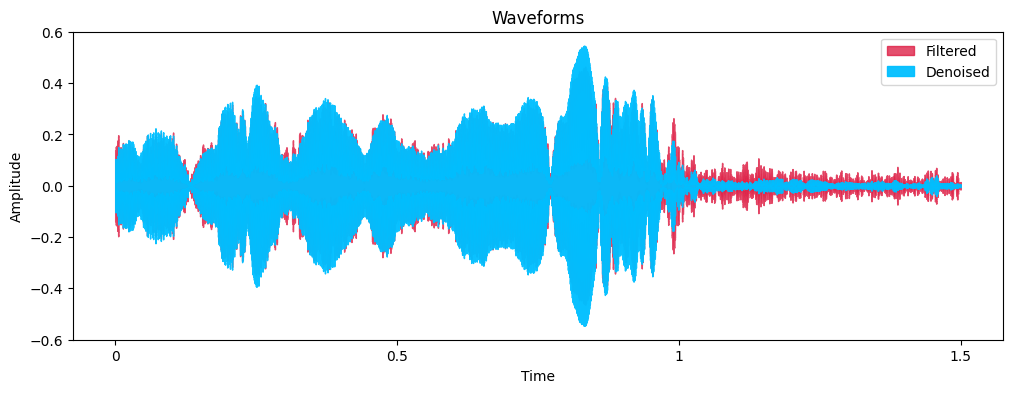

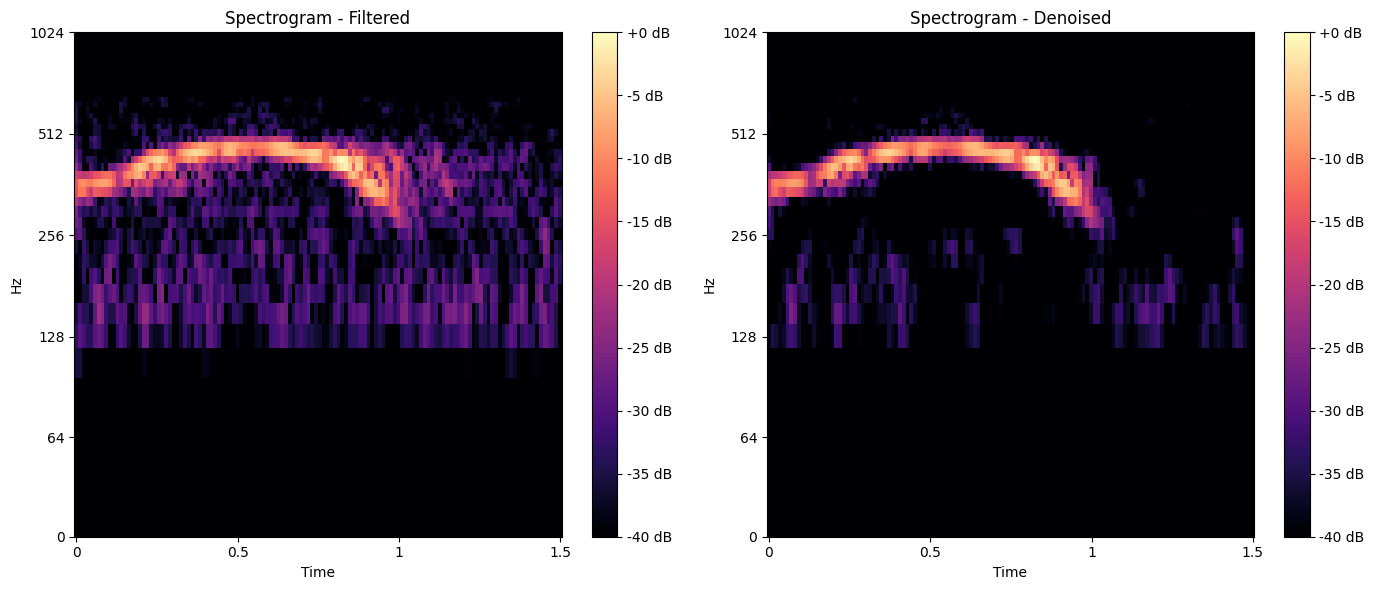

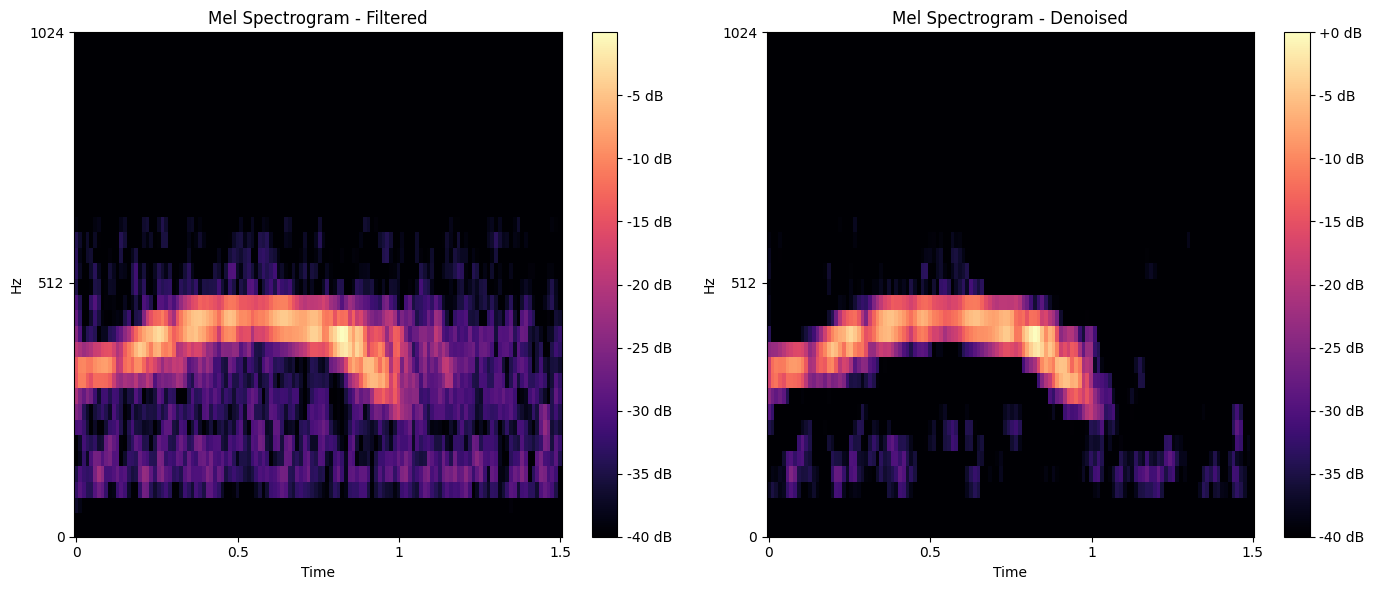

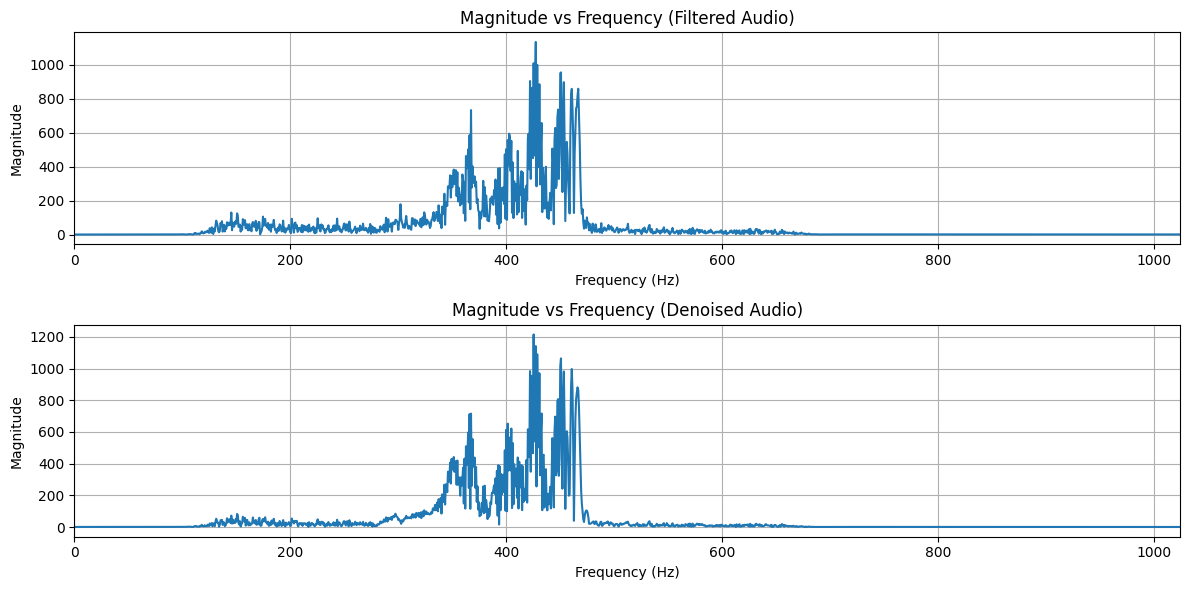

Confirmed_tooth_billed_pigeon_73350_74850.wav


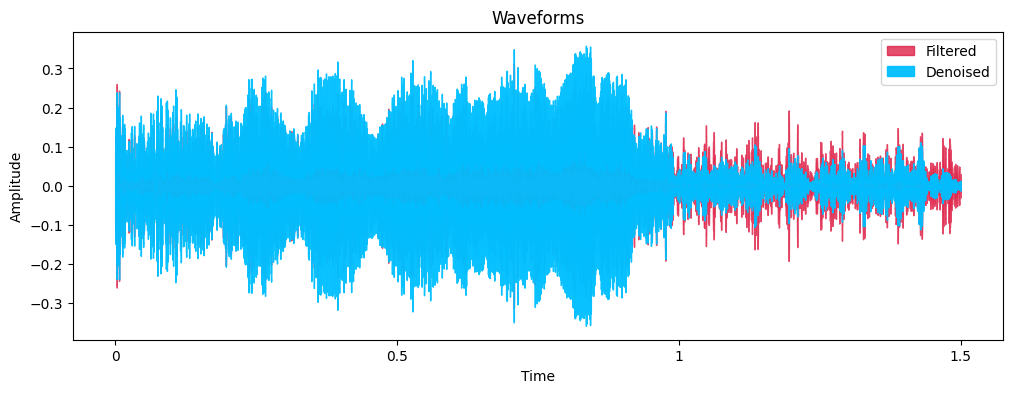

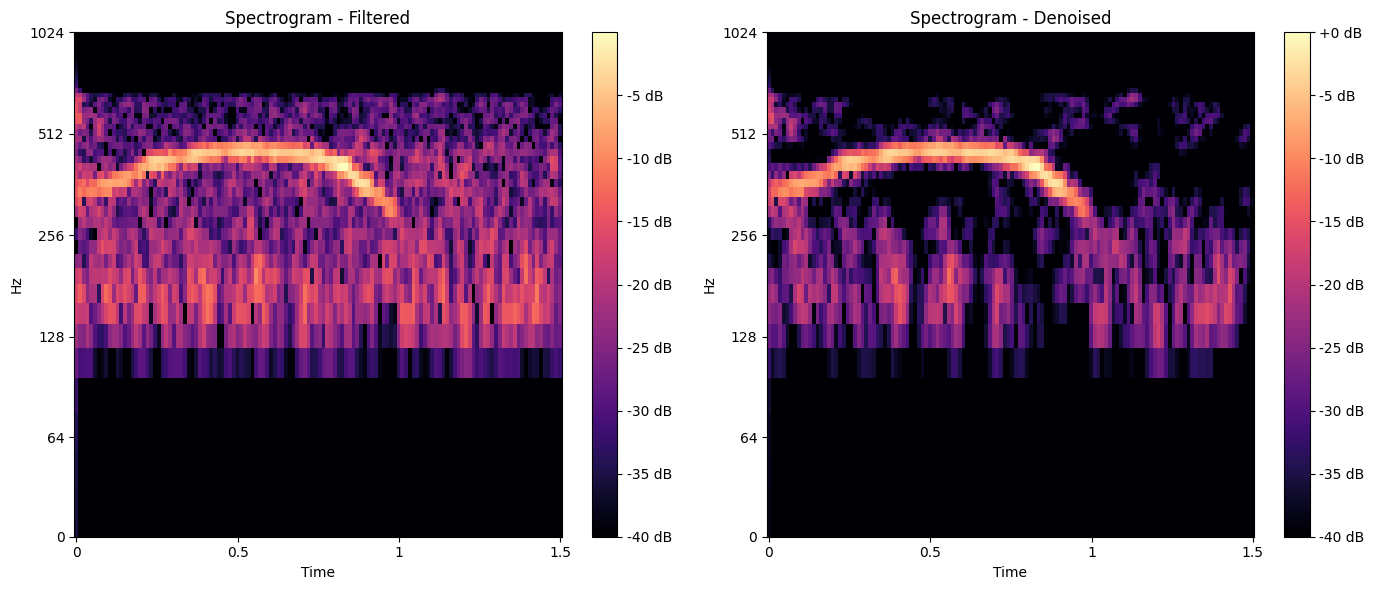

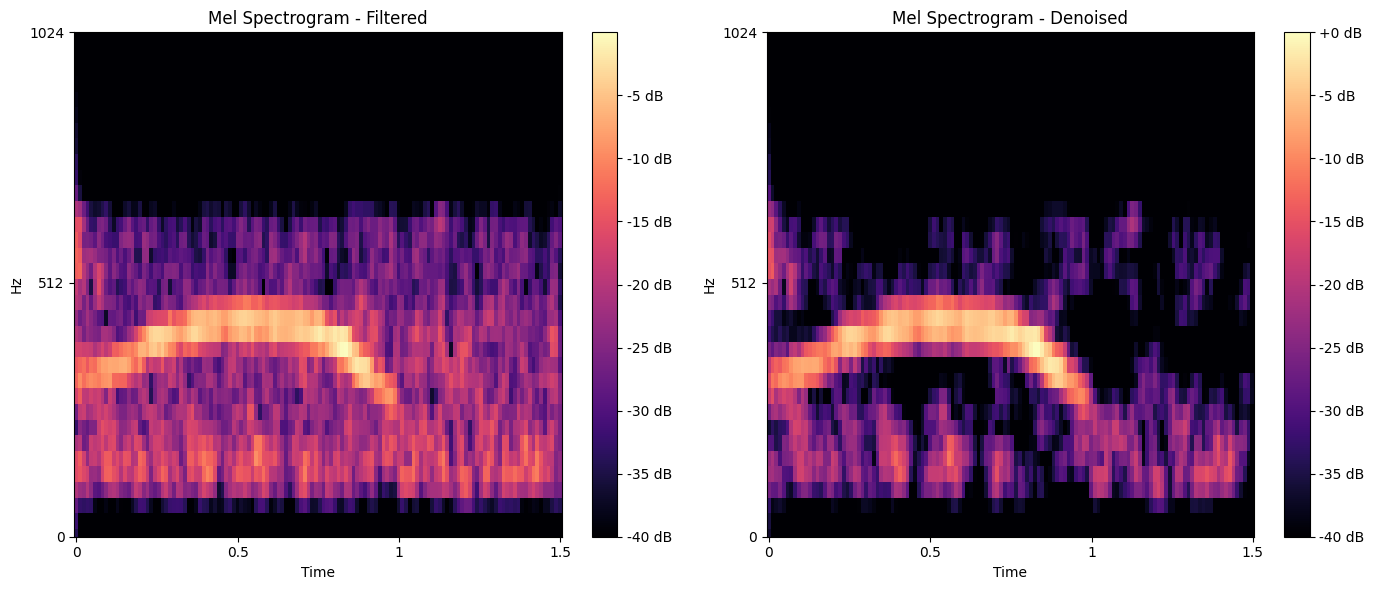

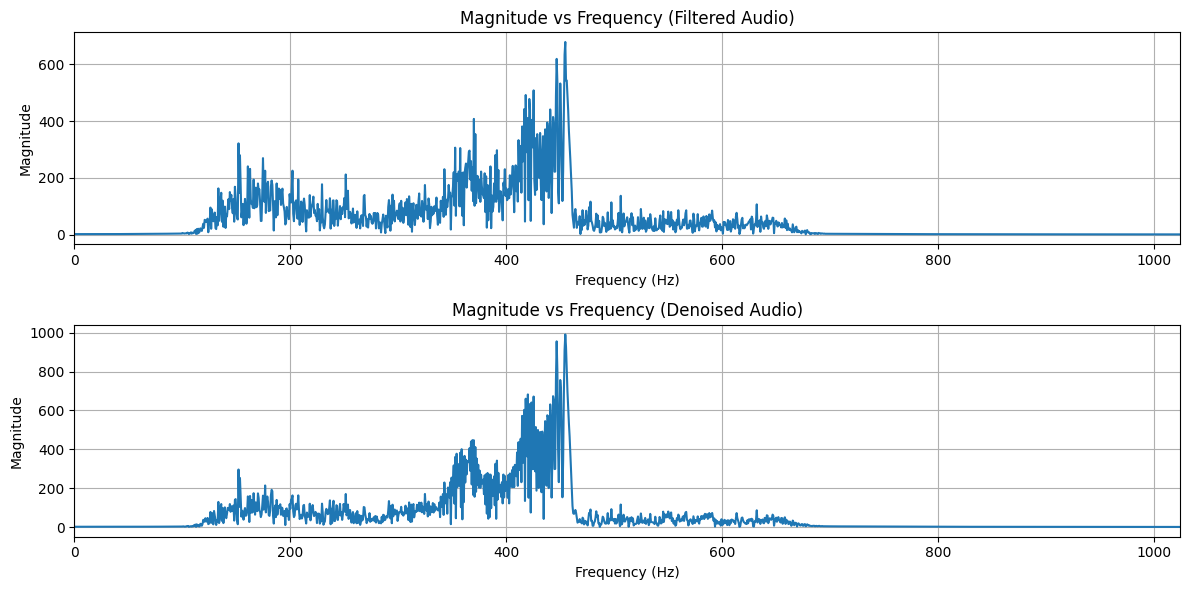

Confirmed_tooth_billed_pigeon_236490_237990.wav


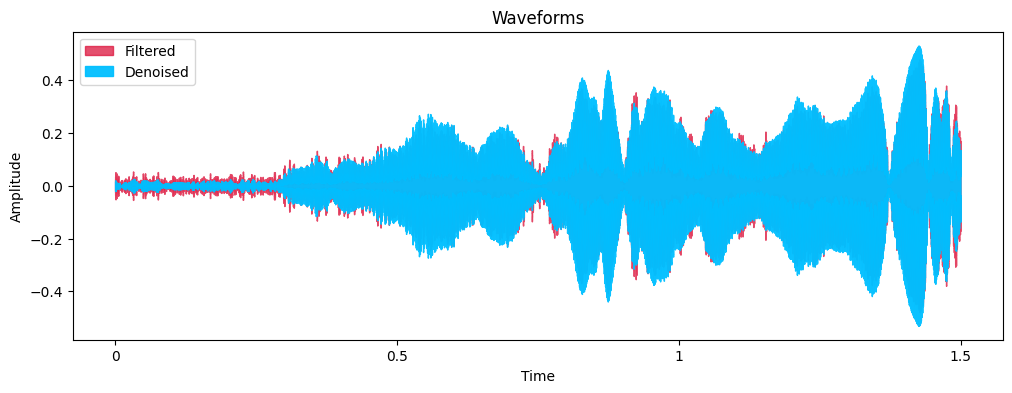

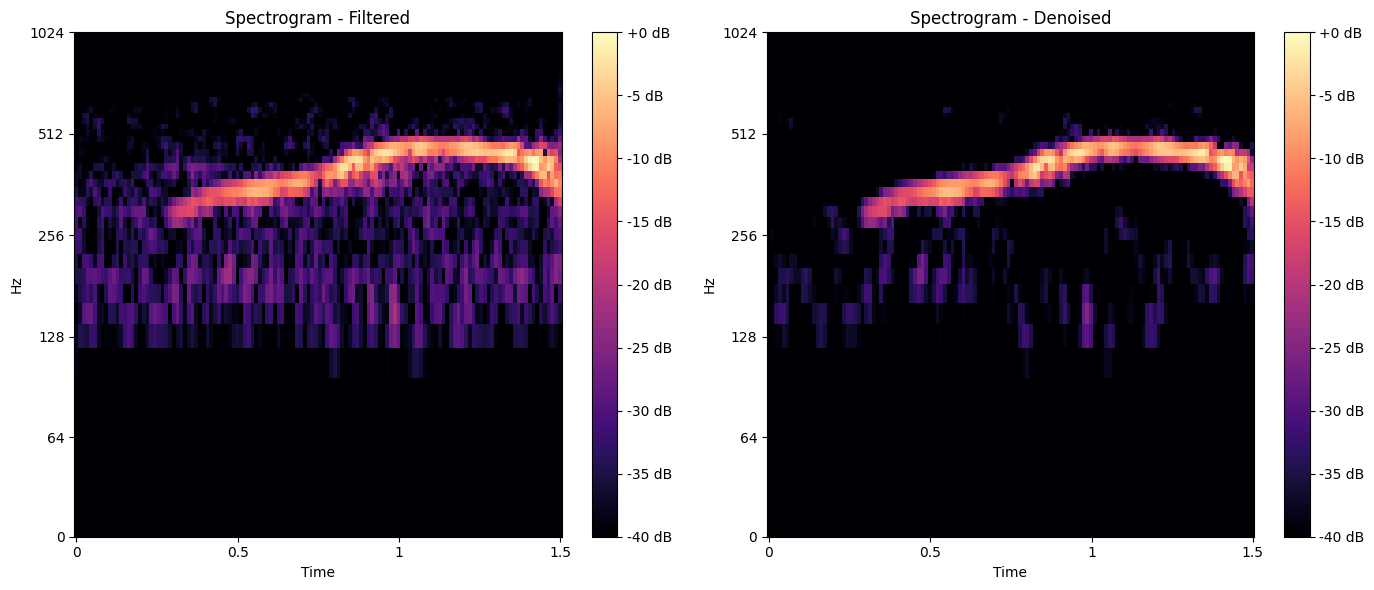

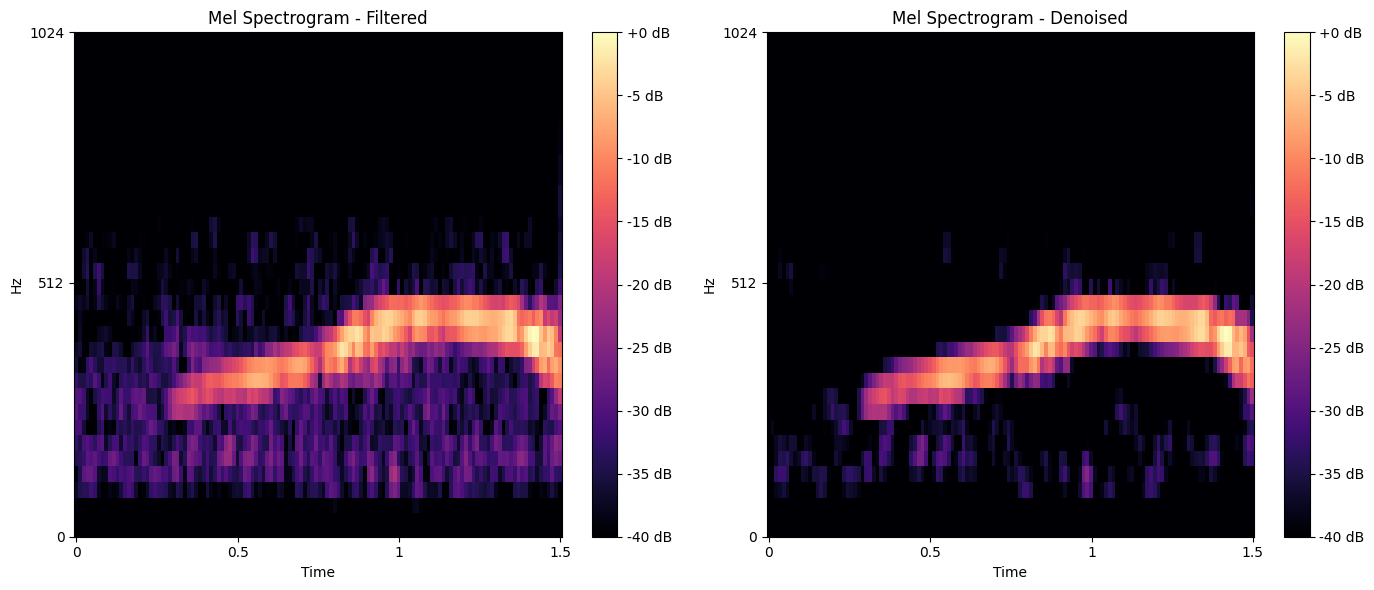

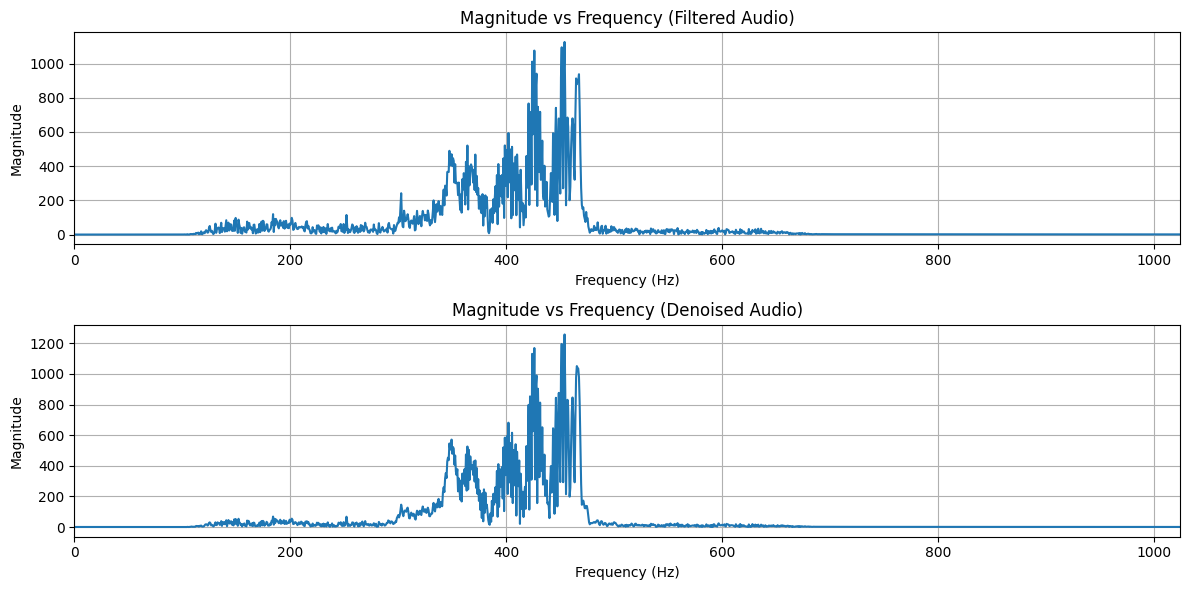

Confirmed_tooth_billed_pigeon_224230_225730.wav


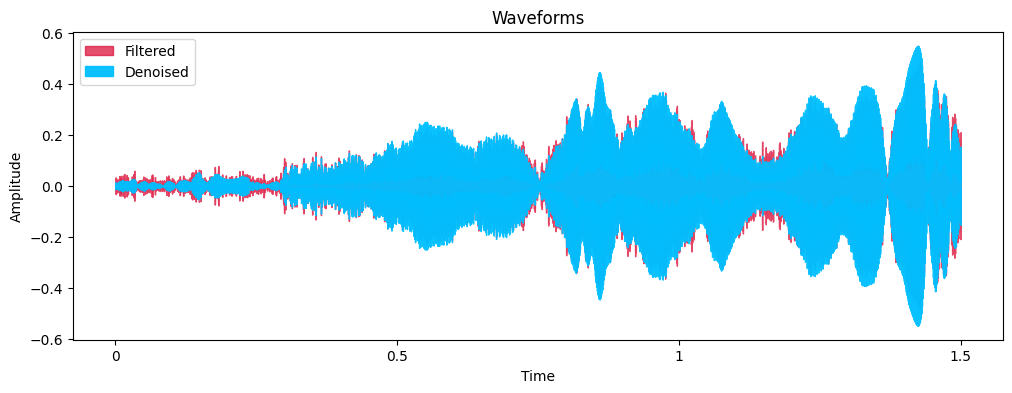

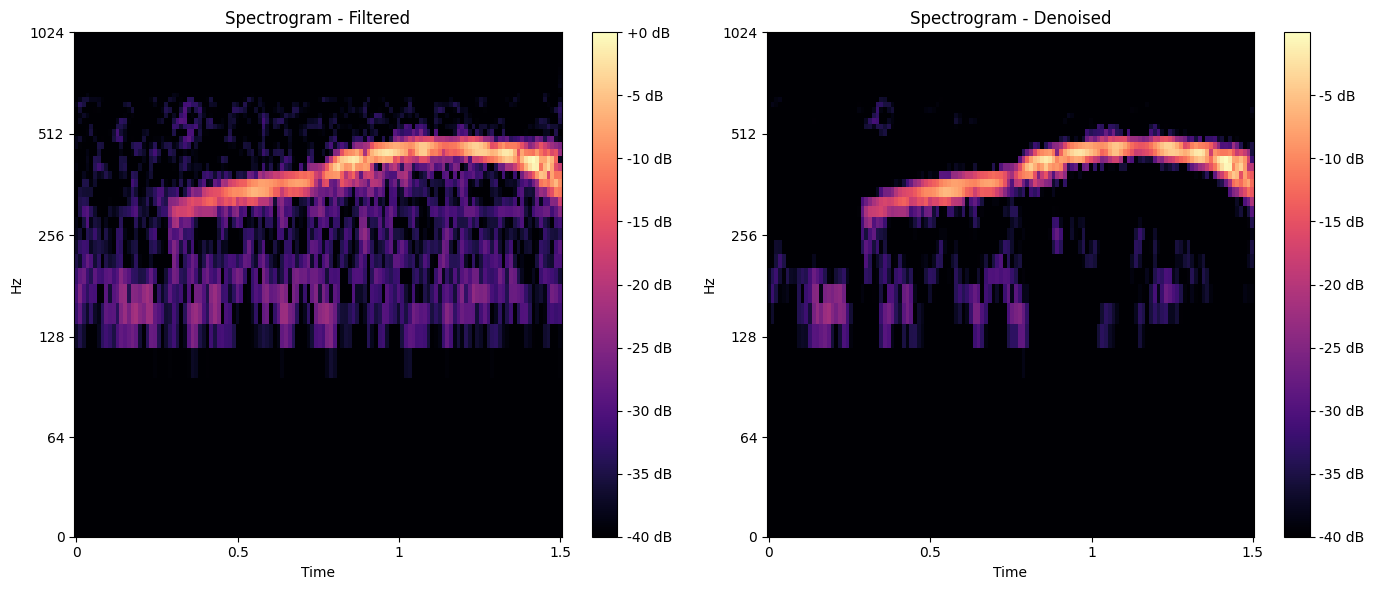

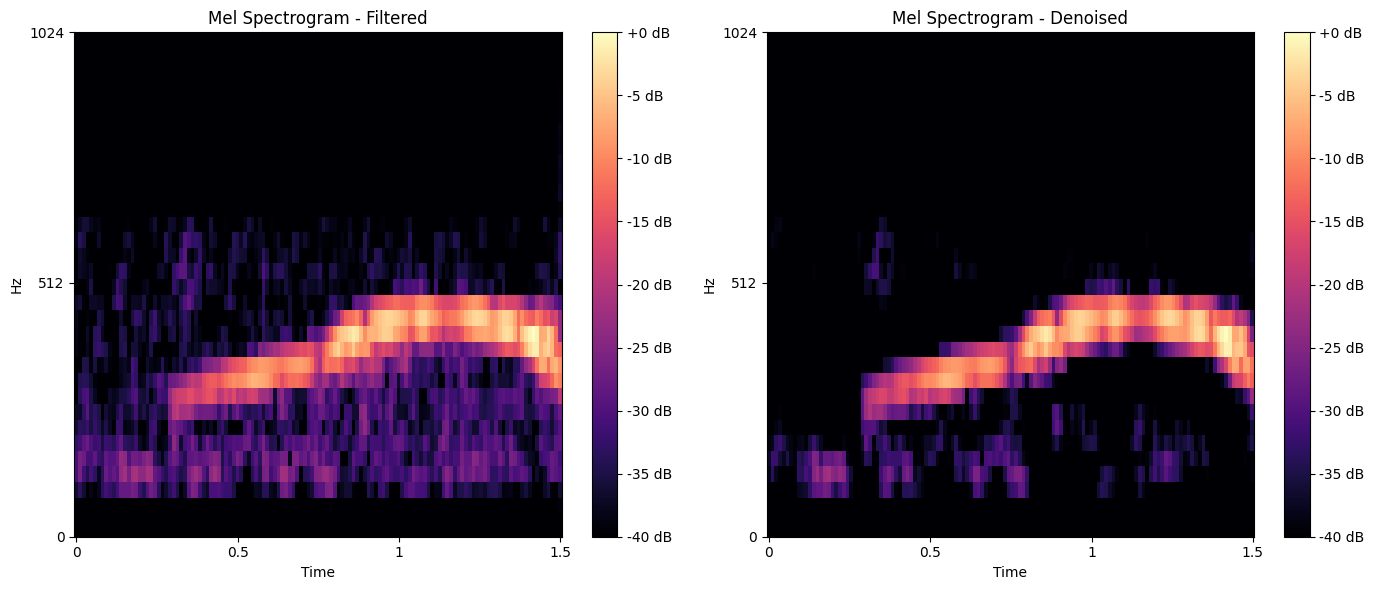

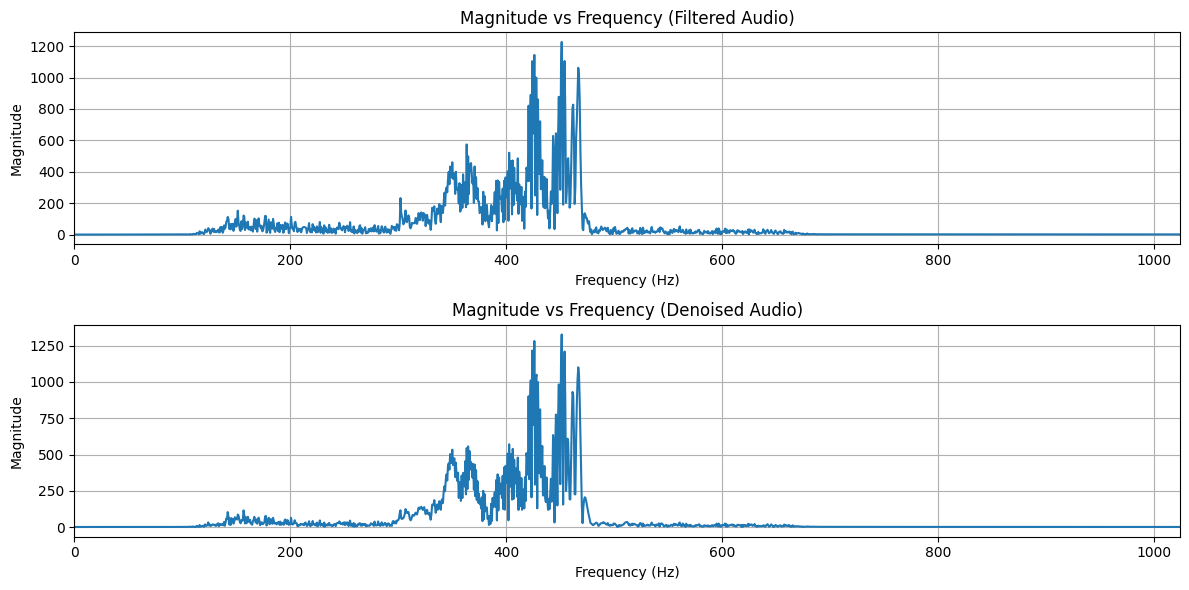

Confirmed_tooth_billed_pigeon_142860_144360.wav


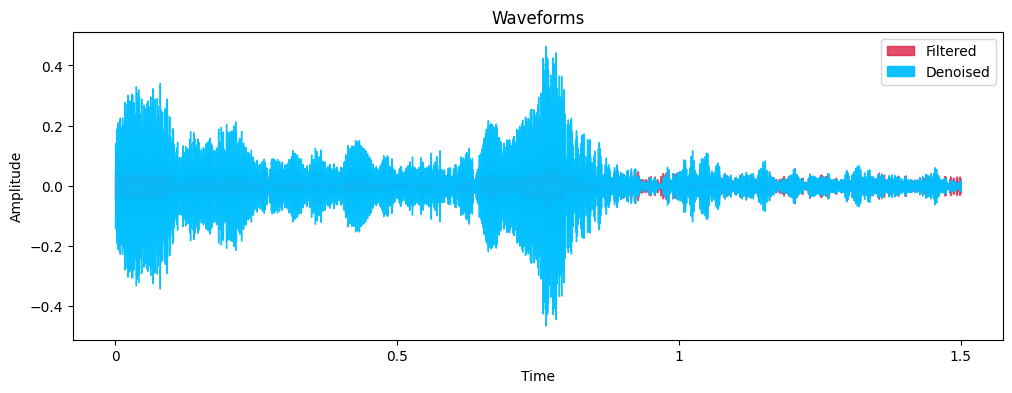

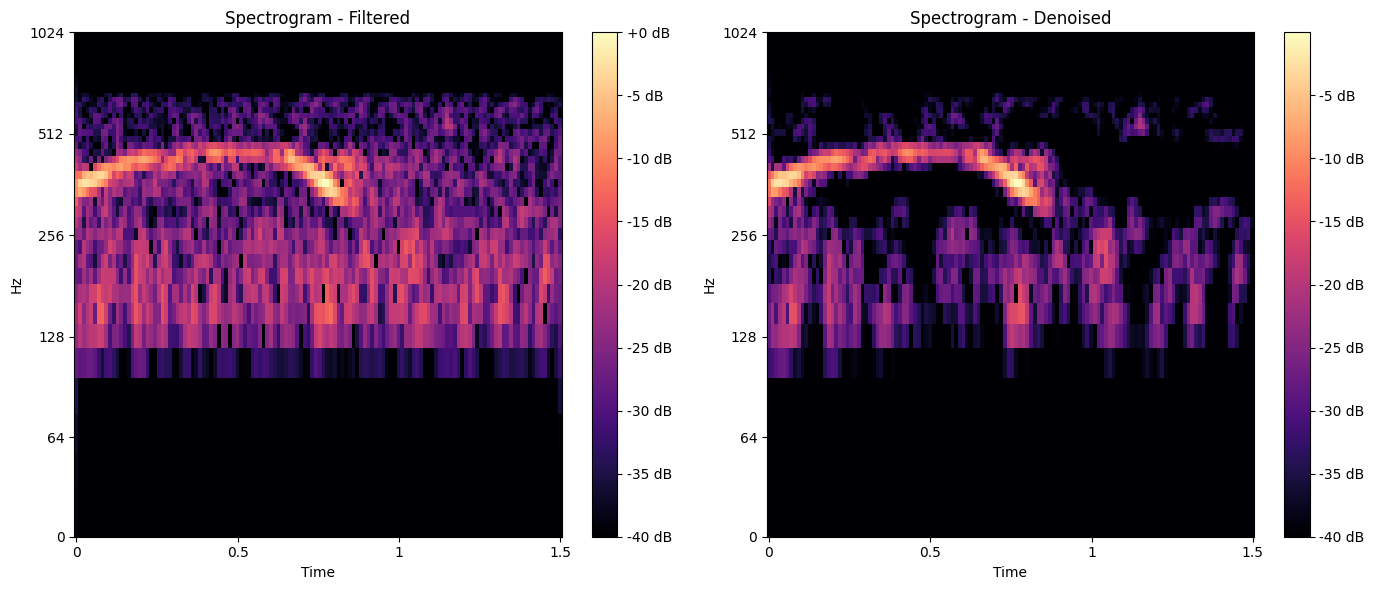

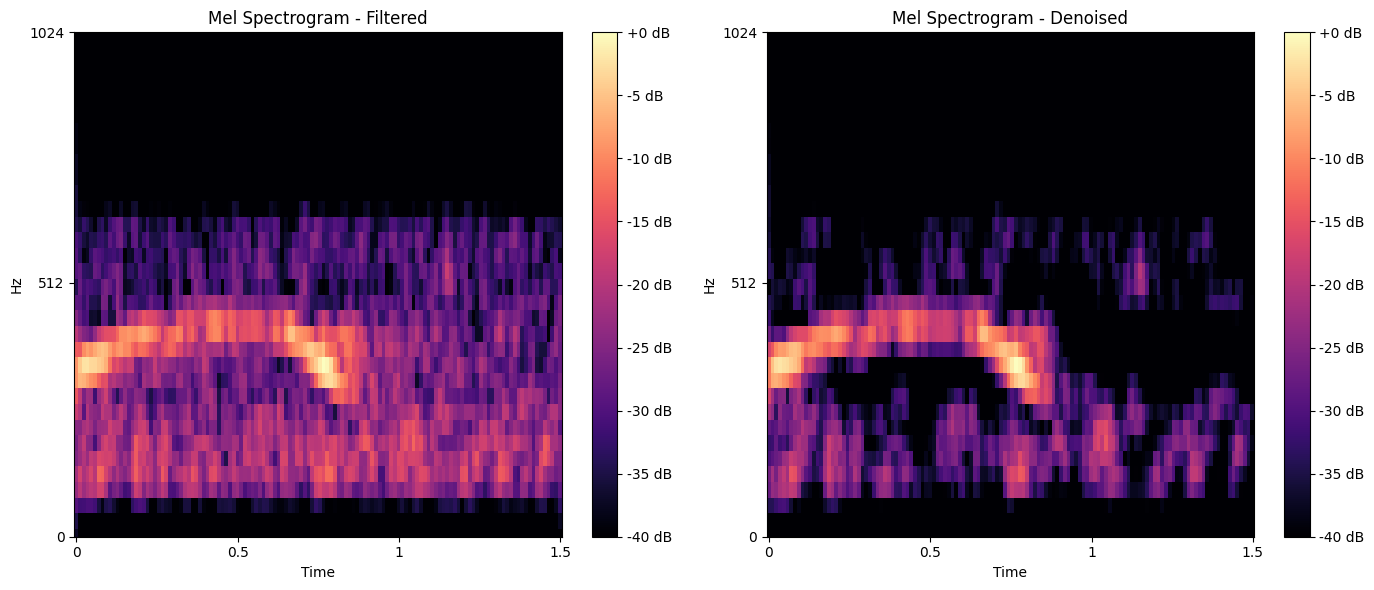

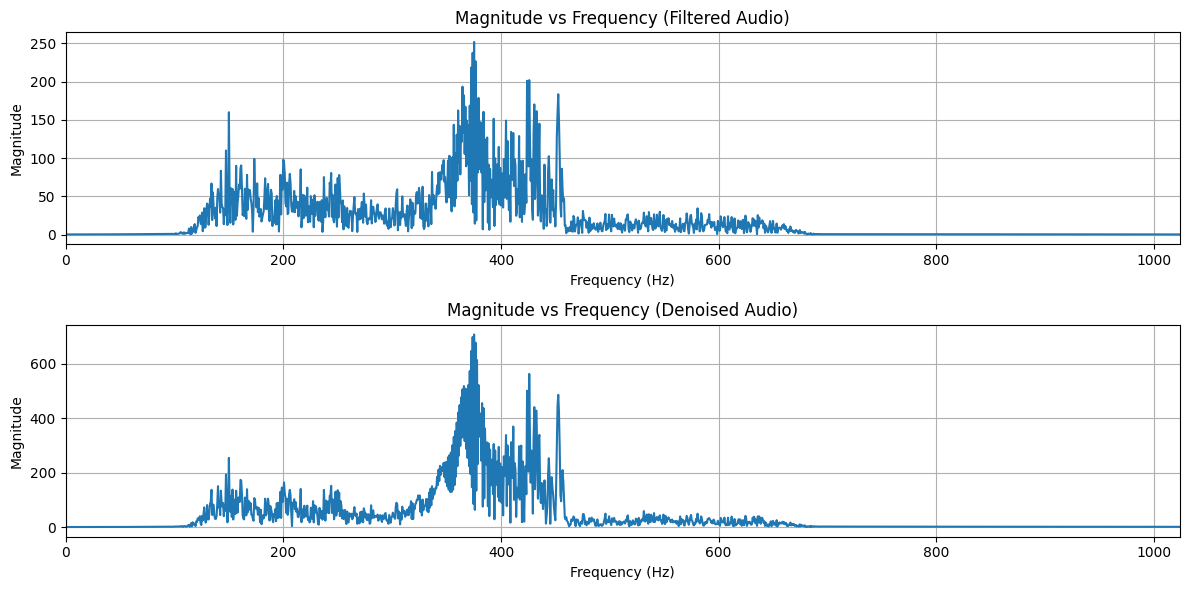

In [147]:
import os
import librosa
import librosa.display
import matplotlib.pyplot as plt
from IPython.display import Audio, display

def display_audio_and_waveforms(audio_list, sr, show_audio=True):
    """
    Display audio files and their waveforms.
    
    Parameters:
    audio_list (list): List of tuples (audio_array, label).
    sr (int): Sample rate.
    show_audio (bool): Whether to display the audio players.
    """
    # Plot waveforms
    plt.figure(figsize=(12, 4))
    colors = ['crimson', 'deepskyblue' ,'r', 'c', 'm', 'y', 'k']
    
    for i, (audio_data, label) in enumerate(audio_list):
        if show_audio:
            display(Audio(audio_data, rate=sr, autoplay=False))
        
        color = colors[i % len(colors)]
        alpha = 0.75 if i < len(audio_list) - 1 else 0.95
        librosa.display.waveshow(audio_data, sr=sr, alpha=alpha, color=color, label=label)
    
    plt.title('Waveforms')
    plt.xlabel('Time')
    plt.ylabel('Amplitude')
    plt.legend()
    plt.show()

def display_spectrogram(audio_list,sr):
    """
    Display the spectrogram of the audio files.
    
    Parameters:
    audio_list (list): List of tuples (audio_array, label).
    sr (int): Sample rate.
    """
    plt.figure(figsize=(14, 6))
    threshold = -40
    for i, (audio_data, label) in enumerate(audio_list):
        plt.subplot(1,len(audio_list), i + 1)
        D = librosa.amplitude_to_db(np.abs(librosa.stft(audio_data)), ref=np.max)
        D[D<threshold] = threshold
        librosa.display.specshow(D, sr=sr, x_axis='time', y_axis='log', label=label)
        plt.ylim([0, 1024])
        plt.colorbar(format='%+2.0f dB')
        plt.title(f'Spectrogram - {label}')
    plt.tight_layout()
    plt.show()

def display_mel_spectrogram(audio_list, sr):
    """
    Display the mel spectrogram of the audio files side by side.
    
    Parameters:
    audio_list (list): List of tuples (audio_array, label).
    sr (int): Sample rate.
    """
    num_audios = len(audio_list)
    plt.figure(figsize=(14, 6))
    threshold = -40
    for i, (audio_data, label) in enumerate(audio_list):
        plt.subplot(1, num_audios, i + 1)
        mel_spectrogram = librosa.feature.melspectrogram(y=audio_data, sr=sr, n_mels=128)
        log_mel_spectrogram = librosa.power_to_db(mel_spectrogram, ref=np.max)
        log_mel_spectrogram[log_mel_spectrogram<threshold] = threshold
        librosa.display.specshow(log_mel_spectrogram, sr=sr, x_axis='time', y_axis='mel')
        plt.ylim([0, 1024])
        plt.colorbar(format='%+2.0f dB')
        plt.title(f'Mel Spectrogram - {label}')
    
    plt.tight_layout()
    plt.show()

def display_frequency_domain(audio_list, sr):
    """
    Display the frequency domain of the audio files.
    
    Parameters:
    audio_list (list): List of tuples (audio_array, label).
    sr (int): Sample rate.
    """
    plt.figure(figsize=(12, 6))
    
    for i, (audio_data, label) in enumerate(audio_list):
        frequencies = np.fft.rfftfreq(len(audio_data), 1/sr)
        magnitude = np.abs(np.fft.rfft(audio_data))
        
        plt.subplot(len(audio_list), 1, i + 1)
        plt.plot(frequencies, magnitude)
        plt.xlim(0, 1024)
        plt.xlabel('Frequency (Hz)')
        plt.ylabel('Magnitude')
        plt.title(f'Magnitude vs Frequency ({label} Audio)')
        plt.grid()
    
    plt.tight_layout()
    plt.show()

for file in os.listdir(os.path.join(tooth_billed_processed, 'segmented_audio', 'raw', 'tooth_billed_pigeon'))[:5]:
    print(file)
    
    # Load raw (filtered) audio
    y_raw, sr = librosa.load(os.path.join(tooth_billed_processed, 'segmented_audio', 'raw', 'tooth_billed_pigeon', file), sr=None)
    
    # Load denoised audio
    y_denoised, _ = librosa.load(os.path.join(tooth_billed_processed, 'segmented_audio', 'denoised', 'tooth_billed_pigeon', file), sr=None)
    
    audio_list = [
        (y_raw, 'Filtered'),
        (y_denoised, 'Denoised'),
    ]
    
    display_audio_and_waveforms(audio_list, sr, show_audio=True)
    display_spectrogram(audio_list, sr)
    display_mel_spectrogram(audio_list, sr)
    display_frequency_domain(audio_list, sr)